In [1]:
from my_library.algorithms.birch import birch as bir

In [2]:
bi = bir.birch('cvs_hcb_member_profiling_preprocessed.csv')

In [3]:
bi.get_shape()

(10000, 55)

In [4]:
folds = 5
params_grid = {"branching_factor": [50, 100, 200, 300, 400, 500],
               "n_clusters": list(range(2, 10)),
               "threshold": [0.2, 0.3, 0.4, 0.5]}

In [5]:
a, b, c = bi.randomizedSearchCV_birch(params_grid, folds, n_iter=10, rand_sample_prop=0.2)

In [6]:
branching_factor = b['branching_factor']
n_clusters = b['n_clusters']
threshold = b['threshold']

In [7]:
print("recommended parameters: branching_factor = {}, n_clusters = {}, threshold = {}".format(branching_factor, n_clusters, threshold))

recommended parameters: branching_factor = 200, n_clusters = 3, threshold = 0.5


In [8]:
bi.get_training_history(c)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_threshold,param_n_clusters,param_branching_factor,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.330767,0.042944,0.066026,0.036636,0.5,3,200,"{'threshold': 0.5, 'n_clusters': 3, 'branching...",0.570493,0.574563,0.581386,0.548901,0.603256,0.575720,0.017540,1
1,0.248984,0.027004,0.041611,0.004063,0.4,5,100,"{'threshold': 0.4, 'n_clusters': 5, 'branching...",0.551539,0.548955,0.528633,0.549647,0.553956,0.546546,0.009123,5
2,0.287472,0.033510,0.047305,0.008593,0.2,4,100,"{'threshold': 0.2, 'n_clusters': 4, 'branching...",0.551518,0.566420,0.548718,0.554833,0.533088,0.550915,0.010759,3
3,0.379119,0.032278,0.048818,0.002500,0.5,5,500,"{'threshold': 0.5, 'n_clusters': 5, 'branching...",0.551539,0.548955,0.528633,0.549647,0.553956,0.546546,0.009123,5
4,0.240936,0.021049,0.040597,0.009523,0.5,7,50,"{'threshold': 0.5, 'n_clusters': 7, 'branching...",0.563603,0.552187,0.518631,0.549625,0.541735,0.545156,0.015000,7
5,0.336685,0.031560,0.045300,0.005404,0.3,4,300,"{'threshold': 0.3, 'n_clusters': 4, 'branching...",0.551518,0.566420,0.548718,0.554833,0.533088,0.550915,0.010759,3
6,0.272851,0.026225,0.043402,0.005481,0.4,9,200,"{'threshold': 0.4, 'n_clusters': 9, 'branching...",0.546307,0.517640,0.532655,0.563171,0.551008,0.542156,0.015675,10
7,0.444112,0.125755,0.065813,0.017098,0.4,7,500,"{'threshold': 0.4, 'n_clusters': 7, 'branching...",0.563603,0.552187,0.518631,0.549625,0.541735,0.545156,0.015000,7
8,0.393528,0.056470,0.075484,0.047172,0.2,7,300,"{'threshold': 0.2, 'n_clusters': 7, 'branching...",0.563603,0.552187,0.518631,0.549625,0.541735,0.545156,0.015000,7
9,0.325983,0.062503,0.087928,0.070664,0.2,3,100,"{'threshold': 0.2, 'n_clusters': 3, 'branching...",0.570493,0.574563,0.581386,0.548901,0.603256,0.575720,0.017540,1


In [9]:
clusters = bi.birch(branching_factor, n_clusters, threshold)

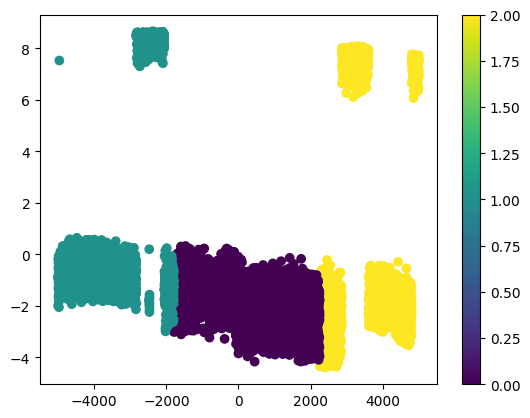

In [10]:
bi.scatter_plot(bi.pca(clusters))

In [11]:
bi.get_davies_bouldin_score(clusters)

0.5000527161444938

In [12]:
bi.get_silhouette_score(clusters)

0.5743268400007114

In [13]:
bi.get_cluster_sizes(clusters)

0    4039
1    3211
2    2750
dtype: int64

In [14]:
bi.get_cluster_centers(clusters)

,Unnamed: 0,spclty_visit_cnt_processed,ucc_mcable_visit_count_processed,srv_copay_amt_processed,aetna_num_children_modif_processed,strat_score_value_processed,ucc_visit_cnt_processed,first_pulse_processed,pcp_visit_cnt_processed,age_nbr_processed,op_rehab_visit_cnt_processed,final_future_tenure_processed,hosop_lab_visit_cnt_processed,income_processed,hosop_rad_visit_cnt_processed,op_rehab_allowed_amt_processed,final_total_tenure_processed,medical_allowed_pmpm_processed,rx_mths_processed,complex_chronic_common_flag_processed,relationship_processed,active_medical_ind_ind,hyc_missing_ind,hyc_ind,a2020_rx_ind_ind,cvs_rx_inrange_ind_ind,marital_ind,ctd_missing_ind,dep_missing_ind,alg_missing_ind,active_dental_ind_ind,cvs_mc_inrange_ind_ind,a2020_medicare_ind_ind,high_pulse_missing_ind,high_pulse_ind,active_pharmacy_ind_ind,active_medicare_ind_ind,hyp_missing_ind,hyp_ind,cvs_hh_inrange_ind_ind,dia_missing_ind,a2020_dental_ind_ind,lbp_missing_ind,obe_missing_ind,anx_missing_ind,ngd_missing_ind,ngd_ind,pcp_flag_ind,gender_cd_ind,urbsubr_R,urbsubr_S,urbsubr_U,lob_CFI,lob_CSI,lob_ME,cluster
0,4769.000248,0.085461,-0.039040,0.117093,-0.444860,0.213149,-0.051073,0.113998,0.066418,0.525166,-0.153429,0.138528,0.091985,-0.035463,0.103663,-0.181322,0.018045,0.028462,0.195950,0.293921,-0.071237,-0.007324,-0.453371,0.350409,0.197607,-0.358996,0.247346,-0.453371,-0.453371,-0.453371,-0.032541,0.154094,0.437620,-0.453371,-0.056831,0.281963,0.396597,-0.453371,0.351210,-0.197741,-0.453371,0.094736,-0.453371,-0.453371,-0.453371,-0.453371,0.172504,-0.192394,0.050475,0.001627,0.019212,-0.019108,-0.028578,-0.333181,0.437327,0
1,8393.999689,-0.243285,0.068754,-0.195432,0.673938,-0.623302,0.053719,-0.496106,-0.101723,-1.006096,0.258763,-0.150428,-0.197058,-0.087846,-0.238870,0.336282,-0.098242,-0.161503,-0.168529,0.180358,-0.856013,-0.037312,0.179307,-0.487256,-0.170093,0.129802,-0.134199,0.179307,0.179307,0.179307,0.046490,-0.029528,-0.398181,0.179307,-0.260592,-0.259375,-0.371240,0.179307,-0.502764,0.040765,0.179307,-0.062218,0.179307,0.179307,0.179307,0.179307,-0.260953,0.117612,0.032908,-0.008788,-0.043236,0.048286,-0.033921,0.346864,-0.398009,1
2,1374.500000,0.158549,-0.022940,0.056216,-0.133536,0.414734,0.012289,0.411840,0.021225,0.403429,-0.076796,-0.027814,0.094991,0.154658,0.126661,-0.126342,0.088207,0.146774,-0.091016,-0.642283,1.104140,0.054324,0.456514,0.054282,-0.091624,0.375705,-0.206587,0.456514,0.456514,0.456514,-0.006489,-0.191844,-0.177814,0.456514,0.387746,-0.111271,-0.149019,0.456514,0.071214,0.242830,0.456514,-0.066494,0.456514,0.456514,0.456514,0.456514,0.051336,0.145247,-0.112557,0.007872,0.022266,-0.028316,0.081580,0.084342,-0.177584,2
